# BANKRUPTCY PREVENTATION PROJECT

# Business Objective:

● This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy).

● The goal here is to model the probability that a business goes bankrupt from different features.

## Details :

● The data file contains 7 features about 250 companies including the following variables:

● industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.

● management_risk: 0=low risk, 0.5=medium risk, 1=high risk.

● financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.

● credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.

● competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high 
competitiveness.

● operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.

● class: bankruptcy, non-bankruptcy (target variable).

# IMPORTING REQUIRED LIBRARIES

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")     # This Would Remove Any Deprecated Warning

In [25]:
df = pd.read_csv("bankruptcy-prevention.csv",sep = ';', header = 0)
df.sample(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
93,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
34,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
35,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
133,1.0,0.0,0.5,0.5,0.5,1.0,non-bankruptcy
166,1.0,1.0,1.0,1.0,1.0,0.5,non-bankruptcy
212,0.5,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
124,1.0,1.0,1.0,1.0,0.5,1.0,non-bankruptcy
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [26]:
df = pd.DataFrame(df)

# BASIC EXPLORATRY DATA ANALYSIS

In [ ]:
df.shape

(250, 7)

In [ ]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [ ]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
df.isna().sum()     # missing values

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [ ]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.groupby(' class').describe().T   

class                        bankruptcy  non-bankruptcy
industrial_risk        count  107.000000      143.000000
                       mean     0.626168        0.437063
                       std      0.412616        0.393016
                       min      0.000000        0.000000
                       25%      0.500000        0.000000
                       50%      0.500000        0.500000
                       75%      1.000000        0.750000
                       max      1.000000        1.000000
 management_risk       count  107.000000      143.000000
                       mean     0.789720        0.482517
                       std      0.336725        0.412876
                       min      0.000000        0.000000
                       25%      0.500000        0.000000
                       50%      1.000000        0.500000
                       75%      1.000000        1.000000
                       max      1.000000        1.000000
 financial_flexibility count  107.000000      143.000000
                       mean     0.028037        0.636364
                       std      0.134441        0.331353
                       min      0.000000        0.000000
                       25%      0.000000        0.500000
                       50%      0.000000        0.500000
                       75%      0.000000        1.000000
                       max      1.000000        1.000000
 credibility           count  107.000000      143.000000
                       mean     0.107477        0.741259
                       std      0.238193        0.295823
                       min      0.000000        0.000000
                       25%      0.000000        0.500000
                       50%      0.000000        1.000000
                       75%      0.000000        1.000000
                       max      1.000000        1.000000
 competitiveness       count  107.000000      143.000000
                       mean     0.018692        0.818182
                       std      0.095296        0.241368
                       min      0.000000        0.500000
                       25%      0.000000        0.500000
                       50%      0.000000        1.000000
                       75%      0.000000        1.000000
                       max      0.500000        1.000000
 operating_risk        count  107.000000      143.000000
                       mean     0.710280        0.465035
                       std      0.388741        0.438669
                       min      0.000000        0.000000
                       25%      0.500000        0.000000
                       50%      1.000000        0.500000
                       75%      1.000000        1.000000
                       max      1.000000        1.000000

In [ ]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [ ]:
df.nunique()     # No of unique values under every column

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

# PIE PLOT

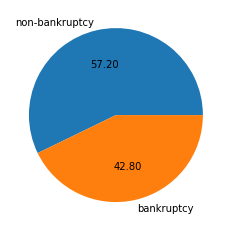

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df[' class'].value_counts(), labels=['non-bankruptcy','bankruptcy'],autopct="%0.2f")
plt.show()

<Figure size 432x288 with 0 Axes>

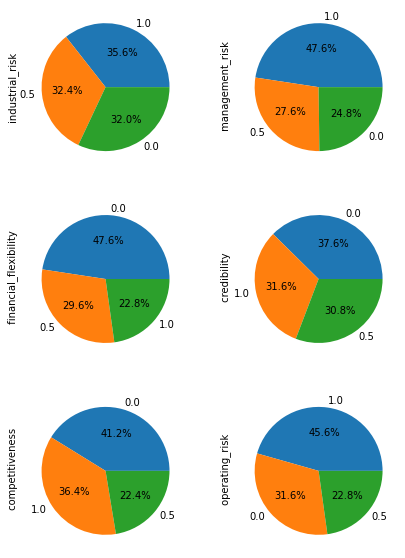

In [ ]:
# fig.axs = plt.plot(3,2)
#plt.style.use('dark_background')
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2,wspace=0.8,hspace=0.5)
plt.figure(figsize=(7,10))
plt.subplot(3,2,1)
df['industrial_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,2)
df[' management_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,3)
df[' financial_flexibility'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,4)
df[' credibility'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,5)
df[' competitiveness'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,6)
df[' operating_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,6)
plt.show()

<Figure size 1152x648 with 0 Axes>

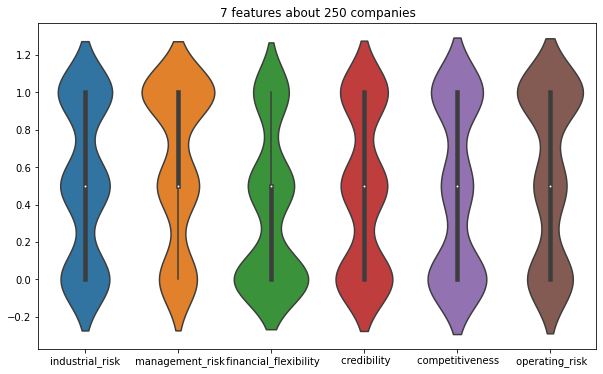

<Figure size 1152x648 with 0 Axes>

In [ ]:
_, ax = plt.subplots(figsize=(10,6))
plt.title("7 features about 250 companies")
sns.violinplot(data=df)
plt.figure(figsize=(16,9))

## INFERANCES

**By above plot we can say that there are no outliers in this dataset**

In [ ]:
df[' class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name:  class, dtype: int64

Text(0.5, 1.0, " NUMBER OF BANKRUPTCY','NON-BANKRUPTCY ")

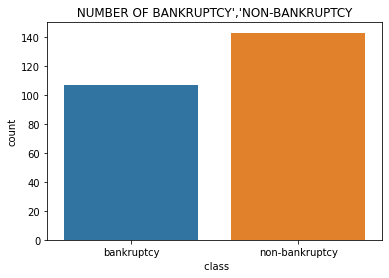

In [ ]:
import seaborn as sns
sns.countplot(x = ' class',data = df)
plt.xlabel(' class')
plt.title(" NUMBER OF BANKRUPTCY','NON-BANKRUPTCY ")

In [ ]:
df['industrial_risk'].value_counts()

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

Text(0.5, 1.0, ' NUMBER OF INDUSTRIAL_RISK ')

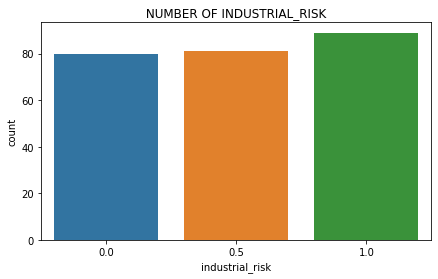

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = 'industrial_risk',data = df)
plt.xlabel('industrial_risk')
plt.title(" NUMBER OF INDUSTRIAL_RISK ")

In [ ]:
df[' management_risk'].value_counts()

1.0    119
0.5     69
0.0     62
Name:  management_risk, dtype: int64

Text(0.5, 1.0, ' NUMBER OF MANAGEMENT_RISK ')

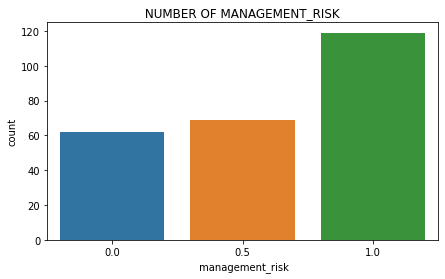

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = ' management_risk',data = df)
plt.xlabel(' management_risk')
plt.title(" NUMBER OF MANAGEMENT_RISK ")

In [ ]:
df[' financial_flexibility'].value_counts()

0.0    119
0.5     74
1.0     57
Name:  financial_flexibility, dtype: int64

Text(0.5, 1.0, ' NUMBER OF FINANCIAL_FLEXIBILITY ')

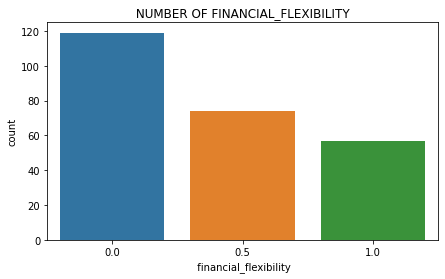

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = ' financial_flexibility',data = df)
plt.xlabel(' financial_flexibility')
plt.title(" NUMBER OF FINANCIAL_FLEXIBILITY ")

In [ ]:
df[' credibility'].value_counts()

0.0    94
1.0    79
0.5    77
Name:  credibility, dtype: int64

Text(0.5, 1.0, ' NUMBER OF CREDIBILITY ')

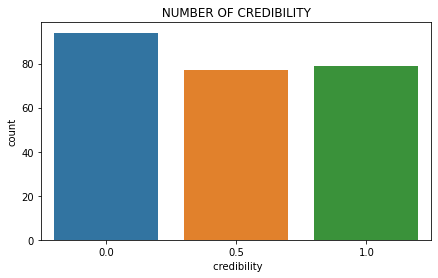

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = ' credibility',data = df)
plt.xlabel(' credibility')
plt.title(" NUMBER OF CREDIBILITY ")

In [ ]:
df[' competitiveness'].value_counts()

0.0    103
1.0     91
0.5     56
Name:  competitiveness, dtype: int64

Text(0.5, 1.0, ' NUMBER OF COMPETITIVENESS ')

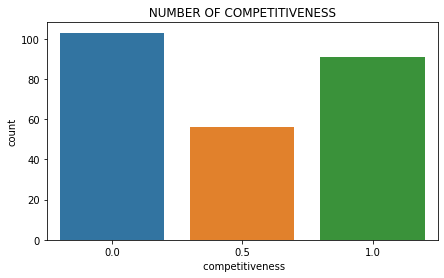

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = ' competitiveness',data = df)
plt.xlabel(' competitiveness')
plt.title(" NUMBER OF COMPETITIVENESS ")

In [ ]:
df[' operating_risk'].value_counts()

1.0    114
0.0     79
0.5     57
Name:  operating_risk, dtype: int64

Text(0.5, 1.0, ' NUMBER OF OPERATING_RISK ')

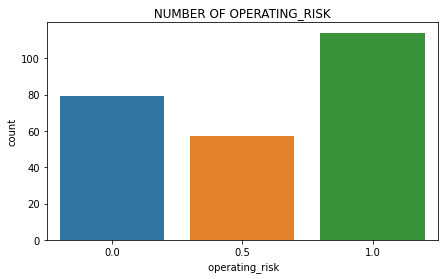

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = ' operating_risk',data = df)
plt.xlabel(' operating_risk')
plt.title(" NUMBER OF OPERATING_RISK ")

# BANKRUPTCY = 0 ,NON-BANKRUPTCY = 1

In [27]:
df["class_as"] = 0

# df.loc[df['class'] == 'bankruptcy', 'class_as'] = 0

df.loc[df[" class"] == 'non-bankruptcy', 'class_as'] = 1
df.sample(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_as
178,0.0,0.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
28,0.5,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
207,0.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy,1
151,1.0,1.0,1.0,0.5,1.0,0.0,non-bankruptcy,1
144,0.5,1.0,0.5,1.0,1.0,0.5,non-bankruptcy,1
221,0.0,0.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
58,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
126,0.5,0.5,0.5,1.0,1.0,0.5,non-bankruptcy,1
88,0.0,0.5,0.0,0.0,0.0,1.0,bankruptcy,0
33,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0


<AxesSubplot:ylabel='Density'>

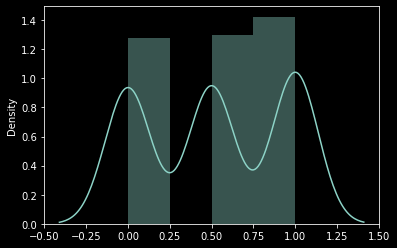

In [ ]:
plt.style.use('dark_background')
sns.distplot([df['industrial_risk']])

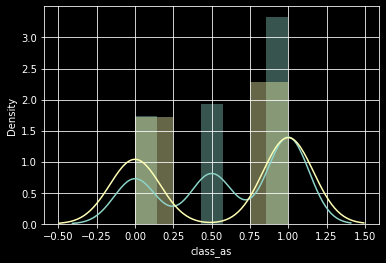

In [ ]:
plt.style.use('dark_background')
sns.distplot(df[' management_risk'])
sns.distplot(df['class_as'])
plt.grid('off') 

# HISTOGARM plot for industrial_risk

In [ ]:
sns.set_theme(style='white')

<AxesSubplot:xlabel='industrial_risk', ylabel='Count'>

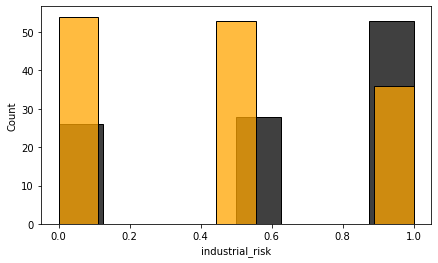

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class_as'] == 0]['industrial_risk'],color= 'black')      # bankruptcy industrial_risk
sns.histplot(df[df['class_as'] == 1]['industrial_risk'],color='orange')      # non-bankruptcy industrial_risk

# HISTOGARM plot for management_risk

<AxesSubplot:xlabel=' management_risk', ylabel='Count'>

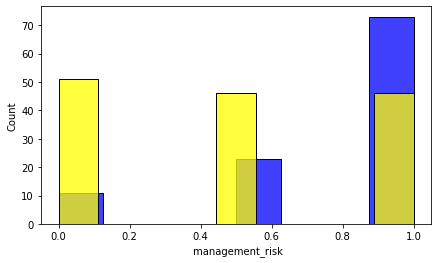

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class_as'] == 0][' management_risk'],color= 'blue')     # bankruptcy industrial_risk
sns.histplot(df[df['class_as'] == 1][' management_risk'],color='yellow')    # non-bankruptcy industrial_risk

# HISTOGARM plot for financial_flexibility

<AxesSubplot:xlabel=' financial_flexibility', ylabel='Count'>

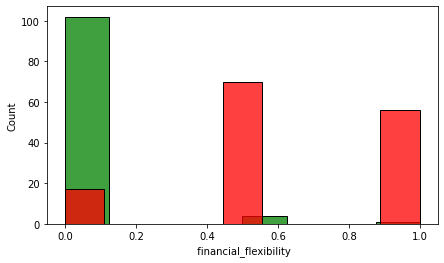

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class_as'] == 0][' financial_flexibility'],color= 'green')   # bankruptcy industrial_risk
sns.histplot(df[df['class_as'] == 1][' financial_flexibility'],color='red')      # non-bankruptcy industrial_risk

# HISTOGARM plot for credibility

<AxesSubplot:xlabel=' credibility', ylabel='Count'>

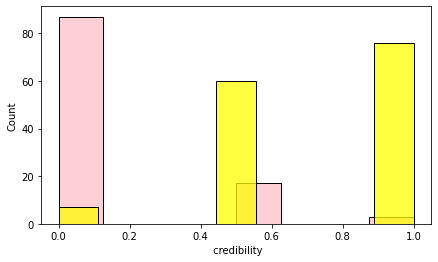

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class_as'] == 0][' credibility'],color= 'pink')    # bankruptcy industrial_risk
sns.histplot(df[df['class_as'] == 1][' credibility'],color='yellow')   # non-bankruptcy industrial_risk

# HISTOGARM plot for competitiveness

<AxesSubplot:xlabel=' competitiveness', ylabel='Count'>

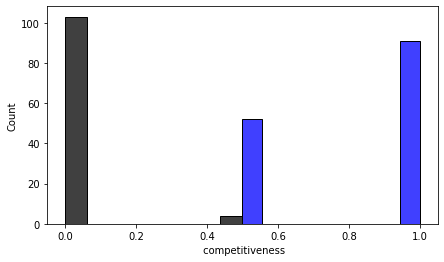

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class_as'] == 0][' competitiveness'],color= 'black')   # bankruptcy industrial_risk
sns.histplot(df[df['class_as'] == 1][' competitiveness'],color='blue')     # non-bankruptcy industrial_risk

# HISTOGARM plot for operating_risk

<AxesSubplot:xlabel=' operating_risk', ylabel='Count'>

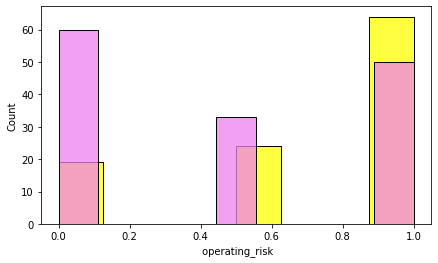

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class_as'] == 0][' operating_risk'],color= 'yellow')     # bankruptcy industrial_risk
sns.histplot(df[df['class_as'] == 1][' operating_risk'],color='violet')      # non-bankruptcy industrial_risk

# corelation

In [ ]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_as
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_as,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


# HEATMAP

<AxesSubplot:>

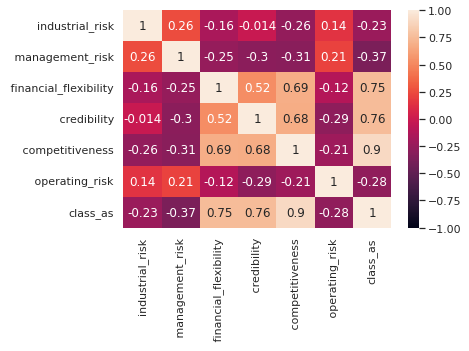

In [ ]:
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)

# inferences

**The correlation of each and every variable with one another is seen**

<Figure size 576x1152 with 0 Axes>

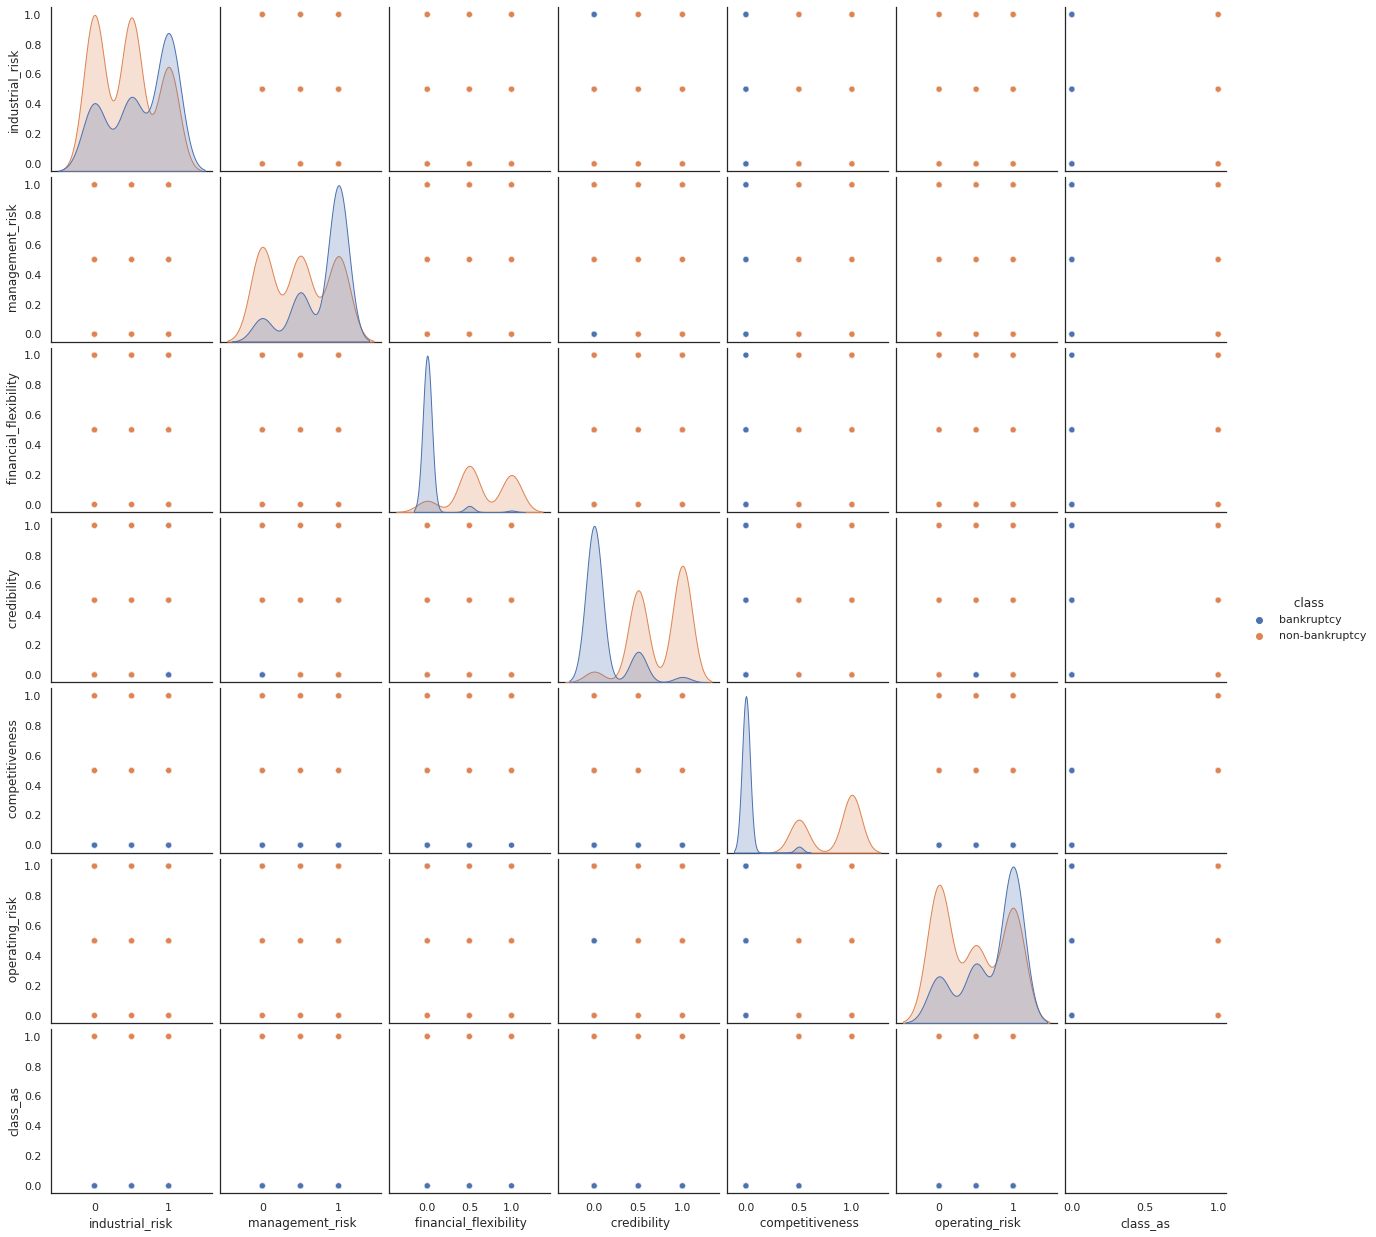

<Figure size 576x1152 with 0 Axes>

In [ ]:
sns.pairplot(df,hue = ' class')
plt.figure(figsize=(8,16))

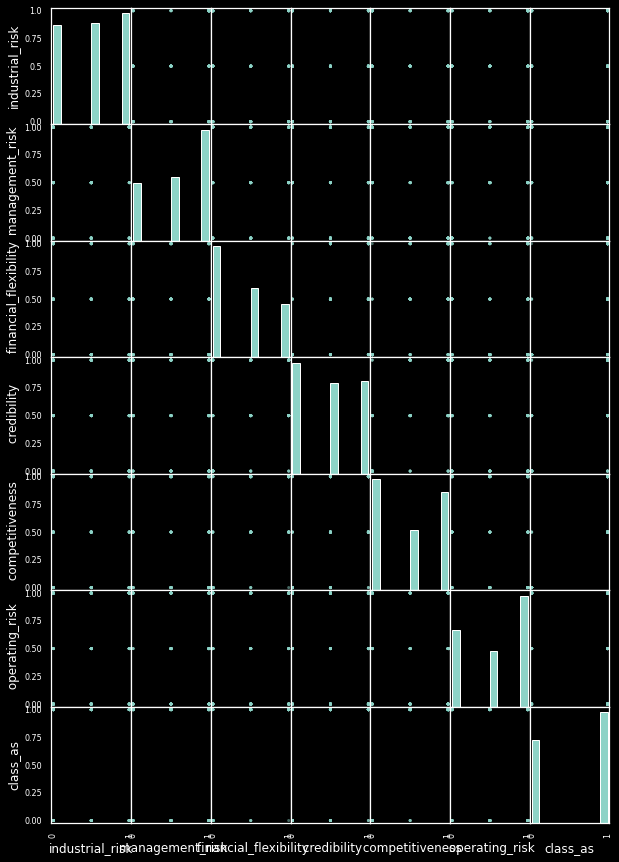

In [ ]:
plt.style.use('dark_background')
pd.plotting.scatter_matrix(df,figsize=(10,15))
plt.show()

In [28]:
df.drop(columns = ' class',axis =1,inplace = True)
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_as
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [29]:
x = df.drop(columns = 'class_as',axis =1)
y = df['class_as']

In [30]:
print(x)

     industrial_risk   management_risk   financial_flexibility   credibility  \
0                0.5               1.0                     0.0           0.0   
1                0.0               1.0                     0.0           0.0   
2                1.0               0.0                     0.0           0.0   
3                0.5               0.0                     0.0           0.5   
4                1.0               1.0                     0.0           0.0   
..               ...               ...                     ...           ...   
245              0.0               1.0                     1.0           1.0   
246              1.0               1.0                     0.5           1.0   
247              0.0               1.0                     1.0           0.5   
248              1.0               0.0                     0.5           1.0   
249              1.0               0.0                     0.5           0.5   

      competitiveness   operating_risk 

In [31]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class_as, Length: 250, dtype: int64


# CHECKING FOR THE DUPLICATES

In [32]:
df.duplicated().sum()

147

# DROPING THE DUPLICATES

In [33]:
df = df.drop_duplicates(keep = "first")

In [11]:
df.duplicated().sum()

0

In [34]:
df['class_as'].value_counts()

1    78
0    25
Name: class_as, dtype: int64

Text(0.5, 1.0, " NUMBER OF BANKRUPTCY = 0','NON-BANKRUPTCY = 1 ")

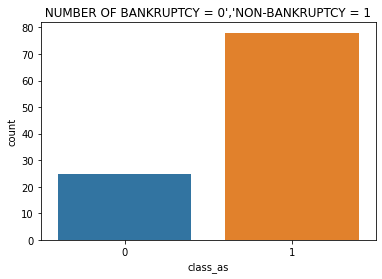

In [ ]:
import seaborn as sns
sns.countplot(x = 'class_as',data = df)
plt.xlabel('class_as')
plt.title(" NUMBER OF BANKRUPTCY = 0','NON-BANKRUPTCY = 1 ")

# PIE PLOT After droping duplicates

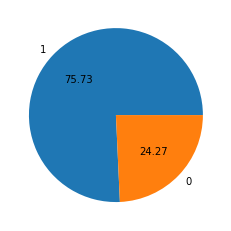

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['class_as'].value_counts(), labels=['1','0'],autopct="%0.2f")
plt.show()

# OVER SAMPLING TECHNIQUE

In [35]:
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

In [36]:
ros=RandomOverSampler(random_state=0)

In [37]:
x,y=ros.fit_resample(x,y)

In [38]:
y.value_counts()

0    143
1    143
Name: class_as, dtype: int64

## *SMOOTHING TECHNIQUE

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
smote = SMOTE(random_state=0)

In [41]:
x,y = smote.fit_resample(x,y)

In [42]:
y.value_counts()

0    143
1    143
Name: class_as, dtype: int64

<AxesSubplot:xlabel='class_as', ylabel='count'>

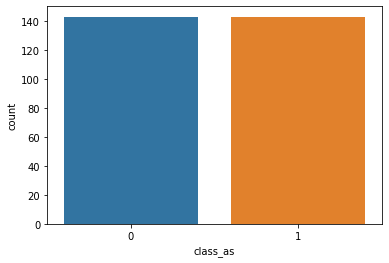

In [43]:
sns.countplot(x = y)

**MODEL BUILDING**

In [44]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 30)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

# def report(model):
    y_pred = model.predict(x_test)
    print('Accuracy of model is: ', accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
#   plot_confusion_matrix(model,x_test,y_test)

# 1.KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
pred_knn = knc.predict(x_test)
pred_knn

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [48]:
report(knc)

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        26

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

[[32  0]
 [ 0 26]]


# 2.SVC

In [50]:
from sklearn.svm import SVC
clf_linear = SVC(kernel='linear')
clf_linear.fit(x_train , y_train)

SVC(kernel='linear')

In [51]:
pred_svc = clf_linear.predict(x_test)
pred_svc

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [52]:
report(clf_linear) 

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        26

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

[[32  0]
 [ 0 26]]


In [53]:
from sklearn.svm import SVC
clf_poly = SVC(kernel='poly')
clf_poly.fit(x_train , y_train)

SVC(kernel='poly')

In [54]:
pred_svc = clf_poly.predict(x_test)
pred_svc

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [55]:
report(clf_poly)

Accuracy of model is:  0.9827586206896551
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        26

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58

[[32  0]
 [ 1 25]]


# 3.NAVIE BAYES

In [56]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import BernoulliNB

In [57]:
GNB = GaussianNB()

MNB = MultinomialNB()

BNB = BernoulliNB()

In [58]:
GNB = GNB.fit(x_train ,y_train)

pred_gnb = GNB.predict(x_test)
pred_gnb

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [59]:
report(GNB)

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        26

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

[[32  0]
 [ 0 26]]


## 4. RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=50, random_state=2)
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [61]:
pred_RF = RFC.predict(x_test)
pred_RF

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [62]:
report(RFC)

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        26

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

[[32  0]
 [ 0 26]]


In [63]:
## Building the model with MultinomialNB

MNB = MNB.fit(x_train ,y_train)

pred_mnb = MNB.predict(x_test)
pred_mnb

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [64]:
report(MNB)

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        26

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

[[32  0]
 [ 0 26]]


In [65]:
## Building the model with BernoulliNB

BNB = BNB.fit(x_train,y_train)

pred_Bnb = BNB.predict(x_test)
pred_Bnb

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [66]:
report(BNB)

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        26

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

[[32  0]
 [ 0 26]]


# 5.DECISION TREE

In [67]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [68]:
model_DT = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

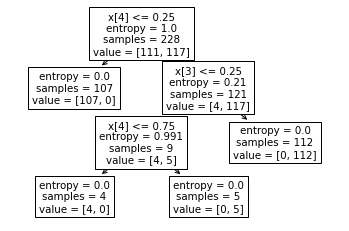

In [69]:
#PLot the decision tree
tree.plot_tree(model_DT);

In [70]:
# Predicting on test data
pred_DT = model_DT.predict(x_test)   # predicting on test data set 

In [71]:
pd.Series(pred_DT).value_counts()    # getting the count of each category 

0    33
1    25
dtype: int64

In [72]:
pred_DT

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [73]:
report(model_DT)

Accuracy of model is:  0.9827586206896551
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        26

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58

[[32  0]
 [ 1 25]]


## 6.LOGISTIC REGRESSION

In [74]:
# model fitting
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [75]:
# predicting the values
pred_LR = LR.predict(x_test)
pred_LR

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [76]:
report(LR)

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        26

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

[[32  0]
 [ 0 26]]


## 7.ADABOOSTCLASSIFIER

In [77]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators=50, random_state=2)

ABC.fit(x_train,y_train)

AdaBoostClassifier(random_state=2)

In [78]:
# predicting the values

pred_AdaBoostClassifier = ABC.predict(x_test)
pred_AdaBoostClassifier

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [79]:
report(ABC)

Accuracy of model is:  0.9827586206896551
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        26

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58

[[32  0]
 [ 1 25]]


# 8.GRADIENTBOOSTINGCLASSIFIER

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT = GradientBoostingClassifier(n_estimators=50, random_state=2)

GBDT.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=2)

In [81]:
# predicting the values

pred_GradientBoostingClassifier = GBDT.predict(x_test)
pred_GradientBoostingClassifier

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [82]:
report(GBDT)

Accuracy of model is:  0.9827586206896551
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        26

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58

[[32  0]
 [ 1 25]]


## 9.XGBOOSTCLASSIFIER

In [83]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators=50,random_state=2)

XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [84]:
# predicting the values

pred_XGBClassifier = XGB.predict(x_test)
pred_XGBClassifier

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [85]:
report(XGB)

Accuracy of model is:  0.9827586206896551
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        26

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58

[[32  0]
 [ 1 25]]


NOTE : From all the models we are getting 0.98% for the following models

Svc clf_poly 

DecisionTreeClassifier

AdaBoostClassifier

GradientBoostingClassifier

XGBClassifier

### SO WE CAN USE ANY OF THIS MODELS FOR DEPLOYMENT

In [86]:
import pickle
pickle_out = open("clf_poly.pkl","wb")
pickle.dump(clf_poly, pickle_out)
pickle_out.close()

In [87]:
import pickle
pickle_out1 = open("model_DT.pkl","wb")
pickle.dump(model_DT, pickle_out1)
pickle_out1.close()

In [88]:
import pickle
pickle_out2 = open("ABC.pkl","wb")
pickle.dump(ABC, pickle_out2)
pickle_out2.close()

In [89]:
import pickle
pickle_out3 = open("GBDT.pkl","wb")
pickle.dump(GBDT, pickle_out3)
pickle_out3.close()

In [90]:
import pickle
pickle_out4 = open("XGB.pkl","wb")
pickle.dump(XGB, pickle_out4)
pickle_out4.close()

In [93]:
!pip install streamlit -q

In [ ]:
!streamlit run /content/BANKRUOTCYstreamlitcodingMAHESH.py & npx localtunnel --port 8501

npx: installed 22 in 3.805s


your url is: https://puny-wings-move-35-225-189-6.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.225.189.6:8501

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
[0]
